# 1. Классы и экземпляры

## 1.1 Введение в ООП

- Развитие методологии “структурное программирование”
- Задача программиста - описание свойств, определяющих поведение объектов и моделирование взаимодействия между объектами
- Близко к естественному восприятию реального мира человеком, что упрощает задачу построения архитектуры

### 1.1.1 Ценность ООП для разработчика

 - Повышение читабельности кода
 - Способ организации кода
 - Выделение значимых и незначимых (с точки зрения поставленной проблемы) свойств объектов, возможность скрыть незначимые от внешнего контрагента
 - Повторное использование кода
 - Лучшие возможности для совместной разработки
 - Удобное покрытие тестами 

### 1.1.2 Принципы ООП

- Инкапсуляция
- Наследование
- Полиморфизм

### 1.1.3 Признаки плохого ООП кода

- Низкая гибкость системы
- Избыточные зависимости между компонентами
- Избыточная (ненужная) функциональность
- Невозможность повторного использования компонентов


### 1.1.4 Объявление класса

In [1]:
class Car:
    """ Common car object
    """


In [2]:
class House:
    pass

In [3]:
help(Car)

Help on class Car in module __main__:

class Car(builtins.object)
 |  Common car object
 |
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



или

In [4]:
class Car(object):
    pass


In [5]:
help(Car)

Help on class Car in module __main__:

class Car(builtins.object)
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



### 1.1.5 Аттрибуты класса

In [6]:
class Car:
    model = "Abstract model"
    
    def number_of_wheels(self):
        return 4

In [7]:
help(Car)

Help on class Car in module __main__:

class Car(builtins.object)
 |  Methods defined here:
 |
 |  number_of_wheels(self)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object
 |
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |
 |  model = 'Abstract model'



### 1.1.6 Инкапсуляция в Python

- Инкапсуляция - это упаковка данных и методов для их обработки в единый компонент
- Строгой изоляции нет, но есть соглашения.

In [8]:
class Car:
    num_wheels = 4
    
    def number_of_wheels(self):
        return self.num_wheels

'Служебный' аттрибут

In [10]:
class A:
    def _private(self):
        print("Это служебный метод!")

a = A()
a._private()

Это служебный метод!


Скрытый аттрибут

In [ ]:
# Когда в классе имя атрибута или метода начинается с двух подчёркиваний, интерпретатор Python автоматически переименовывает его, добавляя к имени префикс _ИмяКласса
class A:
    def __private(self):
        print("Это служебный метод!")

a = A()
a.__private()

AttributeError: 'A' object has no attribute '__private'

In [12]:
print(dir(a))
a._A__private()

['_A__private', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
Это служебный метод!


Name mangling (искажение имен):

```
Since there is a valid use-case for class-private members (namely to avoid name clashes of names with names defined by subclasses), there is limited support for such a mechanism, called name mangling. Any identifier of the form __spam (at least two leading underscores, at most one trailing underscore) is textually replaced with _classname__spam, where classname is the current class name with leading underscore(s) stripped. This mangling is done without regard to the syntactic position of the identifier, as long as it occurs within the definition of a class.
```

Опасности при использовании скрытых аттрибутов:

In [13]:
class BaseClass(object):
    def __init__(self):
        self.func = self.__method

    def __method(self):
        print(1)

    def execute(self):
        self.func()


class AdvancedClass(BaseClass):
    def __method(self):
        print(2)

o = AdvancedClass()
o.execute()

1


In [14]:
print(o.__class__.__bases__[0].__dict__['__init__'])
print(o.__class__.__init__)
print("o.func references to:", o.func)

<function BaseClass.__init__ at 0x7f6649b2d120>
<function BaseClass.__init__ at 0x7f6649b2d120>
o.func references to: <bound method BaseClass.__method of <__main__.AdvancedClass object at 0x7f6658135190>>


## 1.2 Иерархия классов и объектов

In [ ]:
type(1), isinstance(int, object)

PyObject

```
All object types are extensions of this type. This is a type which contains the information Python needs to treat a pointer to an object as an object. In a normal “release” build, it contains only the object’s reference count and a pointer to the corresponding type object. It corresponds to the fields defined by the expansion of the PyObject_HEAD macro.
```

## 1.3 Экземпляры класса

### 1.3.1 Создание экземпляра класса

In [17]:
class Dog:
    name = "Class-wide"
    
    def say(self):
        print("{0} says: Bow-wow!".format(self.name))

one_dog = Dog()

### 1.3.2 Доступ к атрибутам класса и атрибутам экземпляра класса

In [18]:
one_dog.name = 'Bob'
one_dog.say()

another_dog = Dog()
another_dog.name = 'Jack'

print("One dog name is: {0} and another dog name is: {1}".format(one_dog.name, another_dog.name))

Bob says: Bow-wow!
One dog name is: Bob and another dog name is: Jack


In [19]:
print("hasattr result: {0}".format(hasattr(one_dog, 'name')))
print("getattr result: {0}".format(getattr(one_dog, 'name')))
print("delattr result: {0}".format(delattr(one_dog, 'name')))

hasattr result: True
getattr result: Bob
delattr result: None


Прямой доступ к аттрибутам возможен через служебный метод __dict__

In [20]:
help(one_dog)

Help on Dog in module __main__ object:

class Dog(builtins.object)
 |  Methods defined here:
 |
 |  say(self)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object
 |
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |
 |  name = 'Class-wide'



### 1.3.3 Секретный атрибут __dict__

In [21]:
print(one_dog.__dict__)
print(one_dog.__class__.__dict__)

{}
{'__module__': '__main__', 'name': 'Class-wide', 'say': <function Dog.say at 0x7f6649b2e200>, '__dict__': <attribute '__dict__' of 'Dog' objects>, '__weakref__': <attribute '__weakref__' of 'Dog' objects>, '__doc__': None}


In [22]:
one_dog.__dict__['pseudoname'] = 'Pseudobob'
one_dog.__dict__['fn'] = lambda *args: 123
print("One dog pseudoname: {0}".format(one_dog.pseudoname))
print("One dog fn: {0}".format(one_dog.fn()))

One dog pseudoname: Pseudobob
One dog fn: 123


### 1.3.4 Кастомизация класса

https://docs.python.org/3/reference/datamodel.html#basic-customization

In [23]:
class Dog:
    def __new__(cls, *args, **kwargs): # <- allocator
        print(args, kwargs)
        instance = super().__new__(cls)
        return instance
    
    def __init__(self, name):          # <- initializator
        self.name = name
        
    def __del__(self):
        print("{0} says: good-bye!".format(self.name))
    
    def say(self):
        print("Bow-wow!")

In [24]:
d = Dog('somedog')
d.name

('somedog',) {}


'somedog'

### 1.3.5 Деструктор класса

In [25]:
del d

somedog says: good-bye!


# 2. Методы

Методы класса - это процедуры, выполняющиеся в контексте класса или экземпляра класса

## 2.1 Доступ к аттрибутам класса или экземпляра класса

In [ ]:
class Dog:    
    def __init__(self, name):          # <- initializator
        self.name = name
    
    def say(self):
        print("{0} says: Bow-wow!".format(self.name))

dog = Dog("Bob")
dog.say()

## 2.2 Доступ к приватным аттрибутам

In [ ]:
class Dog:    
    def __init__(self):          # <- initializator
        self.__name = "nameless"
    
    def set_name(self, name):
        self.__name = name
        
    def _say(this, word):
        print("{0} says: {1}".format(this.__name, word))
    
    def say_bow(self):
        self._say("Bow!")
        
    def say_wow(self):
        self._say("Wow!")

dog2 = Dog()
dog2.set_name('Bob')
dog2.say_bow()
dog2._say('Wow!')     # <- bad practice

## 2.3 Первый аргумент - ссылка на экземпляр класса

## 2.4 classmethod

In [ ]:
from utils.decoders import UINT32, re_cidr

class IPv4(UINT32):
    @classmethod
    def from_cidr(cls, value):
        cidr = re_cidr.match(value)

        if not cidr:
            raise ValueError("Invalid CIDR string")

        return cls([int(cidr.group(group + 1)) for group in range(4)])

    def __str__(self):
        return '.'.join(['%d' % b for b in self._value[:]])

    def __repr__(self):
        return str(self)

ip = IPv4.from_cidr("192.168.0.1")
#ip = IPv4(3232235521)
#ip = IPv4([192, 168, 0, 1])
print(int(ip), str(ip))

## 2.5 staticmethod

In [ ]:
class MyClass(object):
    @staticmethod
    def the_static_method(x):
        print(x)

MyClass.the_static_method(2)

## 2.6 property

In [ ]:
class NumericList(object):

    ...

    @property
    def packed(self):
        return string_at(self._value, self._size)


In [ ]:
class NumericList:
    def __init__(self, value, size):
        self.value = value
        self.size = size

    @property
    def packed(self):
        return self.value + self.size

numlist = NumericList(2, 2)
print("Packed value: {0}".format(numlist.packed))

In [ ]:
class C:
    def __init__(self):
        self._x = None

    def getx(self):
        return self._x

    def setx(self, value):
        self._x = value

    def delx(self):
        del self._x

    x = property(getx, setx, delx, "I'm the 'x' property.")

c = C()
c.x = 5
print("c.x={0}".format(c.x))

# 3. Наследование

In [28]:
# create absctract animal
class Animal(object):
    def say(self):
        raise NotImplementedError('subclasses must override say()!')
        
# create specific animal
class Dog(Animal):
    name = None
    
    def say(self):
        print("{0} says: Bow!".format(self.__class__))

dog = Dog()
dog.say()

<class '__main__.Dog'> says: Bow!


In [29]:
import abc

# create absctract animal
class Animal(object):
    @abc.abstractmethod
    def say(self):
        # ошибка не перегрузки метода
        raise NotImplementedError('subclasses must override say()!')
        
# create specific animal
class Dog(Animal):
    __name = None
    
    def __init__(self, name):
        self.__name = name
    
    @property    
    def name(self):
        return self.__name
    
    @name.setter    
    def name(self, value):
        self.__name = value
    
    def say(self):
        return "{0} says: Bow!".format(self.__class__) # полиморфизм

dog = Dog("Шарик")
print(dog.name)
print(dog.say())

Шарик
<class '__main__.Dog'> says: Bow!


## 3.1 Абстрактный класс vs Интерфейс

In [45]:
import abc

class Animal(object):
    # абстрактный класс, он не создается
    # Шаблон для шаблонов
    @abc.abstractmethod
    def say(self):
        raise NotImplementedError('subclasses must override say()!')


In [46]:
# create absctract animal
abstract_animal = Animal()
abstract_animal.say()

NotImplementedError: subclasses must override say()!

In [47]:
# create specific animal
class Dog(Animal):
    name = None
    
    def say(self):
        print("{0} says: Bow!".format(self.__class__))

dog = Dog()
dog.say()

<class '__main__.Dog'> says: Bow!


In [48]:
# Альтернативный вариант: использование модуля <abc>
import abc

Миксины или Mixins — это форма множественного наследования в Python и мощный инструмент

In [50]:
class PlayableMixin:
    # Миксин аналог интерфейса
    def play(self):
        print(f"Playing {self.__class__.__name__} as {self.format} format.")

class VideoFile:
    format = "MP4"

class AudioFile:
    format = "MP3"

class PlayableVideoFile(VideoFile, PlayableMixin):
    pass

class PlayableAudioFile(AudioFile, PlayableMixin):
    pass

video = PlayableVideoFile()
video.play()  # Playing PlayableVideoFile as MP4 format.

audio = PlayableAudioFile()
audio.play()  # Playing PlayableAudioFile as MP3 format.

Playing PlayableVideoFile as MP4 format.
Playing PlayableAudioFile as MP3 format.


In [53]:
class Base:
    pass

class Window:
    pass

class HouseBase(Base):
    def check(self):
        print(f"Метод из mixin {self.__class__}")

class GroundBase(Base):
    def check(self):
        print(f"Метод из mixin {self.__class__}")
        
class MKDWithGround(HouseBase, GroundBase):
    pass

print(MKDWithGround.mro()) # __mro__ проходит по дереву наследования до object

[<class '__main__.MKDWithGround'>, <class '__main__.HouseBase'>, <class '__main__.GroundBase'>, <class '__main__.Base'>, <class 'object'>]


In [55]:
dir(MKDWithGround)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'check']

In [54]:
class MKDAnother(Base, Window):
    pass

print(MKDAnother.mro())

[<class '__main__.MKDAnother'>, <class '__main__.Base'>, <class '__main__.Window'>, <class 'object'>]


## 3.2 Множественное наследование

In [ ]:
# class DES_3200_28(IDlinkSwitch, IL2SwitchMixin, QBridgeMIBMixin, 
#                   DlinkL2MgmtMixin, LLDPMixin, DDMMixin, CableDiagMixin, 
#                   AgentGeneralMixin, IpAddrMixin):
#     product = 'DES-3200-28'
#     portnum = 28

Mixin - полный аналог множественного наследования, но обычно примеси не применяются в качестве самостоятельных объектов

## 3.3 MRO

In [ ]:
class X(object): pass
class Y(object): pass
class A(X, Y): pass
class B(Y, X): pass

class C(A, B): pass

Финальный список формируется так: сначала добавляется данный класс, потом рассматривается первый класс из линеаризации первого родителя, если он не встречается в других списках, то добавляется в финальный и так далее. Если участвует, то переходим к рассмотрению следующего родителя. 

## 3.4 Композиция

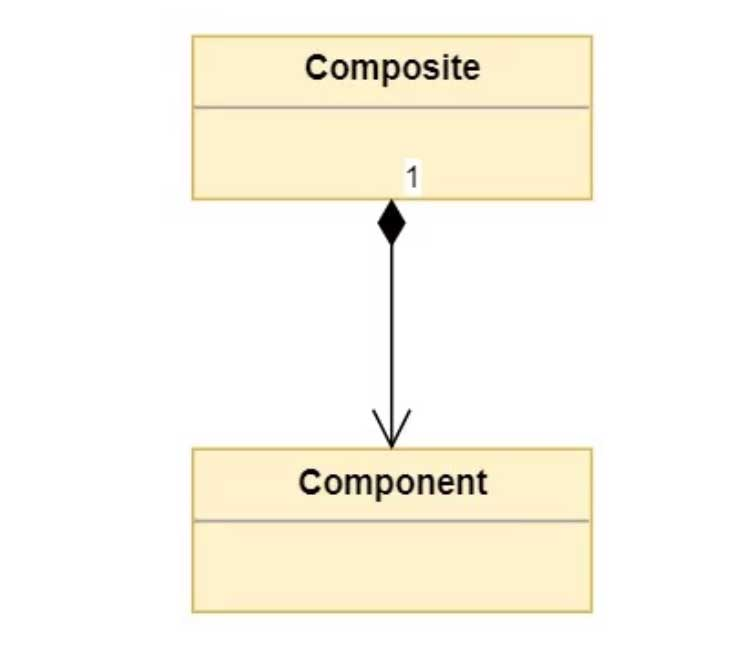

Композиция — это концепция, которая моделирует отношения. Она позволяет создавать сложные типы, комбинируя объекты других типов. 

In [65]:
class Door:
    colour = 'brown'

    def __init__(self, number, status):
        self.number = number
        self.status = status

    @classmethod
    def knock(cls):
        print("Knock!")

    @classmethod
    def paint(cls, colour):
        cls.colour = colour

    @staticmethod
    def open(self):
        self.status = 'open'

    def close(self):
        self.status = 'closed'

# 1. Inheritance
class SecurityDoor(Door):
    colour = 'gray'
    locked = True

    def open(self):
        if not self.locked:
            self.status = 'open'

In [69]:
door_inheritance = SecurityDoor(99, 'closed')
door_inheritance.open()
print("Inheritance SecurityDoor status: <%s>" % door_inheritance.status)

Inheritance SecurityDoor status: <closed>


In [70]:
# 2. Inheritance (call parent method instead of derived class method)
class SecurityDoor(Door):
    colour = 'gray'
    locked = True

    def open(self):
        if not self.locked:
            super().open() # переопределение

In [71]:
door_inheritance2 = SecurityDoor(99, 'closed')
door_inheritance2.open()
print("Inheritance SecurityDoor status: <%s>" % door_inheritance2.status)

Inheritance SecurityDoor status: <closed>


In [73]:
# 3. Composition
class SecurityDoor:
    colour = 'gray'
    locked = True
    
    # __SecurityDoor__colour
    
    def __init__(self, number, status):
        self.door = Door(number, status) # класс внутри другого класса, классы как поля

    def open(self):
        if not self.locked:
            self.door.open()
    
    @property
    def status(self):
        return self.door.status
    
    #def __getattr__(self, attr):
    #    return getattr(self.door, attr)

In [74]:
door_composition = SecurityDoor(99, 'closed')
door_composition.open()
print("Composition SecurityDoor status: <%s>" % door_composition.status)

Composition SecurityDoor status: <closed>


# 4. Полиморфизм

## 4.1 Полиморфизм

In [ ]:
class IPNetworkv4(UINT32):

    ...

    def __contains__(self, ip):
        return int(ip) & self.network_mask == self.network_addr


In [76]:
class CarBase:
    def __init__(self, color, consumption, reserve, mileage=0):
        self.color = color # цвет
        self.consumption = consumption #расход топлива
        self.reserve = reserve # резерв топлива, равен топливу
        self.mileage = mileage # пробег
        self.engine_on = False # включение двигателя
        
    def start_engine(self):
        if not self.engine_on and self.reserve > 0:
            self.engine_on = True
            return "Двигатель запущен."
        return "Двигатель уже был запущен."

    def stop_engine(self):
        if self.engine_on:
            self.engine_on = False
            return "Двигатель остановлен."
        return "Двигатель уже был остановлен."

    def drive(self, distance):
        if not self.engine_on:
            return "Двигатель не запущен."
        if self.reserve / self.consumption * 100 < distance:
            return "Малый запас топлива."
        self.mileage += distance
        self.reserve -= distance / 100 * self.consumption
        return f"Проехали {distance} км. Остаток топлива: {self.reserve} л."
    
    def get_mileage(self):
        return self.mileage

    def get_reserve(self):
        return self.reserve

    def get_consumption(self):
        return self.consumption

In [89]:
class Car(CarBase):
    def __init__(self, color, consumption, tank_volume, mileage=0):
        super().__init__(color, consumption, tank_volume, mileage)
        self.tank_volume = tank_volume # объем топливного бака

    def refuel(self):
        self.reserve = self.tank_volume

In [93]:
class ElectricCar(CarBase):

    def __init__(self, color, consumption, bat_capacity, mileage=0):
        # инициализация, полиморфизм внутреннего метода, переопределение методов класса
        super().__init__(color, consumption, bat_capacity, mileage) # отправили в родителя
        self.bat_capacity = bat_capacity

    def drive(self, distance):
        if not self.engine_on:
            return "Двигатель не запущен."
        if self.reserve / self.consumption * 100 < distance:
            return "Малый заряд батареи."
        self.mileage += distance
        self.reserve -= distance / 100 * self.consumption
        return f"Проехали {distance} км. Остаток заряда: {self.reserve} кВт*ч."
    
    def recharge(self):
        self.reserve = self.bat_capacity


def range_reserve(car):
    return car.get_reserve() / car.get_consumption() * 100



In [91]:

car_1 = Car("black", 10, 55, 1000)
car_2 = ElectricCar("white", 15, 90, 1000)
print(f"Запас хода: {range_reserve(car_1)} км.")
print(f"Запас хода: {range_reserve(car_2)} км.")

Запас хода: 550.0 км.
Запас хода: 600.0 км.


In [118]:
car_2.__dict__

{'color': 'white',
 'consumption': 15,
 'reserve': 90,
 'mileage': 1000,
 'engine_on': False,
 'bat_capacity': 90}

In [94]:
# Использование len()
# полностью функциональный полиморфизм, функциональный полиморфизм
# Sequence, MutableSequence, MutableMapping перегруженный метод __len__

text = 'Data Science'
print(len(text))

numbers = [num for num in range(20)]
print(len(numbers))

data_dict = {'name': 'Alice', 'age': 20}
print(len(data_dict))

12
20
2


## 4.2 Множественная диспетчеризация (мультиметоды)

Pythonic way от великого пожизненного диктатора (создатель языка Гвидо ван Россум)

Множественная диспетчеризация - это техника программирования, которая позволяет выбирать различные реализации функций динамически на основе типов или свойств нескольких аргументов. 

In [99]:
#from mm import multimethod

registry = {}

class MultiMethod(object):
    '''
    Класс с различными реализациями метода
    '''
    def __init__(self, name):
        self.name = name
        self.typemap = {}
    def __call__(self, *args):
        # для использования объекта как функции
        types = tuple(arg.__class__ for arg in args) # a generator expression!
        function = self.typemap.get(types)
        if function is None:
            raise TypeError("no match") # ошибка type error
        return function(*args)
    def register(self, types, function):
        # регистрации новых комбинаций типов и соответствующих функций
        if types in self.typemap:
            raise TypeError("duplicate registration")
        self.typemap[types] = function

def multimethod(*types):
    # * - означает, что types - tuple
    def register(function):
        name = function.__name__
        mm = registry.get(name)
        if mm is None:
            mm = registry[name] = MultiMethod(name)
        mm.register(types, function)
        return mm
    return register

# будущая лекция про декораторы, вариант полиморфизма как в других языках
# декоратор вкладывает переменные в функцию

@multimethod(int, int)
def foo(a, b):
    print("Two ints passed")

@multimethod(float, float)
def foo(a, b):
    print("Two floats passed")

@multimethod(str, str)
def foo(a, b):
    print("Two strings passed")

foo(1,1)
foo(1.0,1.0)
foo("1.0","1.0")
# foo(1,"1.0") # TypeError

Two ints passed
Two floats passed
Two strings passed


# 5. Магические методы

In [100]:
', '.join((method for method in dir(1)))


'__abs__, __add__, __and__, __bool__, __ceil__, __class__, __delattr__, __dir__, __divmod__, __doc__, __eq__, __float__, __floor__, __floordiv__, __format__, __ge__, __getattribute__, __getnewargs__, __getstate__, __gt__, __hash__, __index__, __init__, __init_subclass__, __int__, __invert__, __le__, __lshift__, __lt__, __mod__, __mul__, __ne__, __neg__, __new__, __or__, __pos__, __pow__, __radd__, __rand__, __rdivmod__, __reduce__, __reduce_ex__, __repr__, __rfloordiv__, __rlshift__, __rmod__, __rmul__, __ror__, __round__, __rpow__, __rrshift__, __rshift__, __rsub__, __rtruediv__, __rxor__, __setattr__, __sizeof__, __str__, __sub__, __subclasshook__, __truediv__, __trunc__, __xor__, as_integer_ratio, bit_count, bit_length, conjugate, denominator, from_bytes, imag, is_integer, numerator, real, to_bytes'

In [101]:
class BrokenInt(int):
    def __add__(self, other):
        return str(self) + str(other)

In [102]:
bi = BrokenInt(1)
bi += 1
print(bi)

11


Магический метод ```__slots__```

__slots__ - это специальный атрибут класса, который позволяет ограничить набор атрибутов, которые могут иметь объекты этого класса.

In [38]:
class Automobile:
    __slots__ = ['_color', '_engine_volume'] # создать список полей класса
    # экономия памяти, ускорение доступа к аттрибутам
    
    def __init__(self, color, engine_volume):
        self._color = color
        self._engine_volume = engine_volume
        # self.consumption = 100
    
    @property 
    def name(self):
        return self._name
    
    @name.setter 
    def name(self, value):
        self._name = value


In [39]:
auto = Automobile("Зелёный", 2000)

print(auto._color)
# auto.name = 'BMW'

Зелёный


In [149]:
dir(auto)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_color',
 '_engine_volume',
 'name']

In [114]:
auto = Automobile("Зелёный", 2000)

print(auto._color)
# auto.name = 'BMW'

Зелёный


In [116]:
print(dir(auto))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_color', '_engine_volume', 'name']


In [117]:
auto.__slots__

['_color', '_engine_volume']

In [119]:
class MySecondClass:
    __slots__ = ['a', 'b']
    
    def __init__(self):
        self.d = 4

In [120]:
msc = MySecondClass()

AttributeError: 'MySecondClass' object has no attribute 'd'

In [151]:
class ElectricCar(CarBase):

    def __init__(self, color, consumption, bat_capacity, mileage=0):
        # инициализация, полиморфизм внутреннего метода, переопределение методов класса
        super().__init__(color, consumption, bat_capacity, mileage) # отправили в родителя
        self.bat_capacity = bat_capacity

    def drive(self, distance):
        if not self.engine_on:
            return "Двигатель не запущен."
        if self.reserve / self.consumption * 100 < distance:
            return "Малый заряд батареи."
        self.mileage += distance
        self.reserve -= distance / 100 * self.consumption
        return f"Проехали {distance} км. Остаток заряда: {self.reserve} кВт*ч."
    
    def recharge(self):
        self.reserve = self.bat_capacity
        
    def __eq__(self, other):
        # сравнение экземпляров
        if isinstance(other, ElectricCar):
            return (self.color == other.color and
                    self.consumption == other.consumption and
                    self.bat_capacity == other.bat_capacity and
                    self.mileage == other.mileage)
        return NotImplemented
    
    def __hash__(self):
        return hash((self.color, self.consumption, self.bat_capacity, self.mileage))
    
    def __lt__(self, other):
        # less than
        if isinstance(other, ElectricCar):
            return self.bat_capacity < other.bat_capacity
        return NotImplemented

    def __gt__(self, other):
        # grater than
        if isinstance(other, ElectricCar):
            return self.bat_capacity > other.bat_capacity
        return NotImplemented


def range_reserve(car):
    return car.get_reserve() / car.get_consumption() * 100

In [ ]:
object

In [ ]:
test = (1,)


In [143]:
car_01 = ElectricCar("Красный", 10, 50) 
car_02 = Car("Зеленый", 12, 60) 
car_03 = ElectricCar("Синий", 15, 75)
car_04 = ElectricCar("Синий", 15, 75)

In [144]:
car_01 == car_03

False

In [145]:
car_04 == car_03

True

In [153]:
car_04 is car_03 # указатели по памяти, __is__ dunder method

False

In [155]:
car_03 is car_03 # указатели по памяти

True

In [154]:
car_04 is not car_03 # указатели по памяти

True

In [146]:
car_04 < car_03 # less than

False

In [148]:
car_04 < car_02 # сравнение объектов двух типов

TypeError: '<' not supported between instances of 'ElectricCar' and 'Car'

Сравнить машины

In [122]:
dir(car_03)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bat_capacity',
 'color',
 'consumption',
 'drive',
 'engine_on',
 'get_consumption',
 'get_mileage',
 'get_reserve',
 'mileage',
 'recharge',
 'reserve',
 'start_engine',
 'stop_engine']

# Пример задания

Cпроектируйте объектную модель соревнования, вы должны учитывать разные спецификации автомобилей, погодные условия, и то что в один момент времени может проходить только одно соревнование, как итог, запустите гонку с разными автомобилями и продемонстрируйте победителей)

Требования к решению:
 1. Описать 3 класса:
  - Автомобиль
  - Погода
  - Соревнование
 2. Выполнить требования к классу Автомобиль:
  - Зафиксировать спецификации автомобилей как атрибут класса
 3. Выполнить требования к классу Погода:
  - Реализовать доступ к функции получения скорости ветра как к переменной экземпляра класса
 4. Выполнить требования к классу Соревнование:
  - в качестве входных аргументов принимает 1 параметр — длина дистанции
  - не позволять создание более 1 экземпляра класса (обратите внимание на метод класса new)

In [ ]:
#!/usr/bin/env python

from random import randint

CAR_SPECS = {
    'ferrary': {"max_speed": 340, "drag_coef": 0.324, "time_to_max": 26},
    'bugatti': {"max_speed": 407, "drag_coef": 0.39, "time_to_max": 32},
    'toyota': {"max_speed": 180, "drag_coef": 0.25, "time_to_max": 40},
    'lada': {"max_speed": 180, "drag_coef": 0.32, "time_to_max": 56},
    'sx4': {"max_speed": 180, "drag_coef": 0.33, "time_to_max": 44},
}


def start(competitors, distance, wind_speed):
    for competitor_name in competitors:
        competitor_time = 0
        competitor_speed = 0
        car = CAR_SPECS[competitor_name]

        for distance in range(distance):
            _wind_speed = randint(0, wind_speed)

            if competitor_time == 0:
                _speed = 1
            else:
                _speed = (competitor_time / car["time_to_max"]) * car['max_speed']
                if _speed > _wind_speed:
                    _speed -= (car["drag_coef"] * _wind_speed)

            competitor_time += float(1) / _speed

        print("Car <%s> result: %f" % (competitor_name, competitor_time))


competitors = ('ferrary', 'bugatti', 'toyota', 'lada', 'sx4')
start(competitors, distance=10000, wind_speed=20)